In [1]:
import pandas as pd
import nltk

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

df = pd.read_csv('Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [3]:
df.groupby('airline_sentiment').describe()

tweet_id                                            \
                     count          mean           std           min   
airline_sentiment                                                      
negative            9178.0  5.692602e+17  7.572474e+14  5.675900e+17   
neutral             3099.0  5.691841e+17  8.068405e+14  5.675883e+17   
positive            2363.0  5.691006e+17  8.112476e+14  5.676555e+17   

                                                                           \
                            25%           50%           75%           max   
airline_sentiment                                                           
negative           5.686511e+17  5.695355e+17  5.698798e+17  5.703106e+17   
neutral            5.684852e+17  5.693080e+17  5.699305e+17  5.703093e+17   
positive           5.684331e+17  5.691980e+17  5.698788e+17  5.703093e+17   

                  airline_sentiment_confidence            ...  \
                                         count      mean  ...   
airline_sentiment                                         ...   
negative                                9178.0  0.933365  ...   
neutral                                 3099.0  0.823303  ...   
positive                                2363.0  0.872039  ...   

                  negativereason_confidence      retweet_count            \
                                        75%  max         count      mean   
airline_sentiment                                                          
negative                                1.0  1.0        9178.0  0.093375   
neutral                                 0.0  0.0        3099.0  0.060987   
positive                                0.0  0.0        2363.0  0.069403   

                                                       
                        std  min  25%  50%  75%   max  
airline_sentiment                                      
negative           0.792865  0.0  0.0  0.0  0.0  44.0  
neutral            0.658037  0.0  0.0  0.0  0.0  28.0  
positive           0.659914  0.0  0.0  0.0  0.0  22.0  

[3 rows x 32 columns]

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['airline_sentiment'] = label_encoder.fit_transform(df['airline_sentiment'])

In [5]:
df.groupby('airline_sentiment').describe()

tweet_id                                            \
                     count          mean           std           min   
airline_sentiment                                                      
0                   9178.0  5.692602e+17  7.572474e+14  5.675900e+17   
1                   3099.0  5.691841e+17  8.068405e+14  5.675883e+17   
2                   2363.0  5.691006e+17  8.112476e+14  5.676555e+17   

                                                                           \
                            25%           50%           75%           max   
airline_sentiment                                                           
0                  5.686511e+17  5.695355e+17  5.698798e+17  5.703106e+17   
1                  5.684852e+17  5.693080e+17  5.699305e+17  5.703093e+17   
2                  5.684331e+17  5.691980e+17  5.698788e+17  5.703093e+17   

                  airline_sentiment_confidence            ...  \
                                         count      mean  ...   
airline_sentiment                                         ...   
0                                       9178.0  0.933365  ...   
1                                       3099.0  0.823303  ...   
2                                       2363.0  0.872039  ...   

                  negativereason_confidence      retweet_count            \
                                        75%  max         count      mean   
airline_sentiment                                                          
0                                       1.0  1.0        9178.0  0.093375   
1                                       0.0  0.0        3099.0  0.060987   
2                                       0.0  0.0        2363.0  0.069403   

                                                       
                        std  min  25%  50%  75%   max  
airline_sentiment                                      
0                  0.792865  0.0  0.0  0.0  0.0  44.0  
1                  0.658037  0.0  0.0  0.0  0.0  28.0  
2                  0.659914  0.0  0.0  0.0  0.0  22.0  

[3 rows x 32 columns]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words= 'english')
x = vectorizer.fit_transform(df['text'])
y = df['airline_sentiment']

In [7]:
print(x)

  (0, 94806)	1
  (0, 26789)	1
  (0, 74375)	1
  (0, 94876)	1
  (0, 26790)	1
  (1, 94806)	1
  (1, 67415)	1
  (1, 94331)	1
  (1, 6237)	1
  (1, 20861)	1
  (1, 31364)	1
  (1, 83247)	1
  (1, 95004)	1
  (1, 67458)	1
  (1, 94339)	1
  (1, 6242)	1
  (1, 20864)	1
  (1, 31463)	1
  (2, 94806)	1
  (2, 27062)	1
  (2, 86661)	1
  (2, 57507)	1
  (2, 60547)	1
  (2, 88409)	1
  (2, 94878)	1
  :	:
  (14638, 10359)	1
  (14638, 28494)	1
  (14638, 9086)	1
  (14638, 59586)	1
  (14638, 66146)	1
  (14638, 82272)	1
  (14638, 56627)	1
  (14639, 60547)	1
  (14639, 33556)	2
  (14639, 75693)	1
  (14639, 51700)	1
  (14639, 67460)	1
  (14639, 65231)	1
  (14639, 65293)	1
  (14639, 80916)	1
  (14639, 8413)	1
  (14639, 68071)	1
  (14639, 51882)	1
  (14639, 60692)	1
  (14639, 75762)	1
  (14639, 34731)	1
  (14639, 9186)	1
  (14639, 68088)	1
  (14639, 67473)	1
  (14639, 80941)	1


In [8]:
print(y)

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int32


Split the dataset so that 80% can be used for training and 20% for testing.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)  

In [10]:
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((14640, 100073), (14640,), (10248, 100073), (4392, 100073), (10248,), (4392,))

## Train a Naive Bayes classifier

The next step is to train a Naive Bayes classifier. We'll use scikit-learn's [MultinomialDB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier, which is ideal for datasets vectorized by `CountVectorizer`.

In [11]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

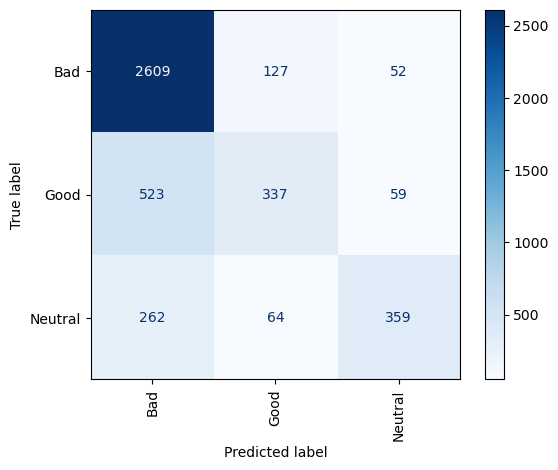

In [12]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels = ['Bad', 'Good','Neutral'],
                   cmap = 'Blues', xticks_rotation = 'vertical')

In [13]:
model.score(x_test, y_test)

0.7525045537340619

Use Scikit’s [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) class to visualize the ROC curve.

In [14]:
model

MultinomialNB()

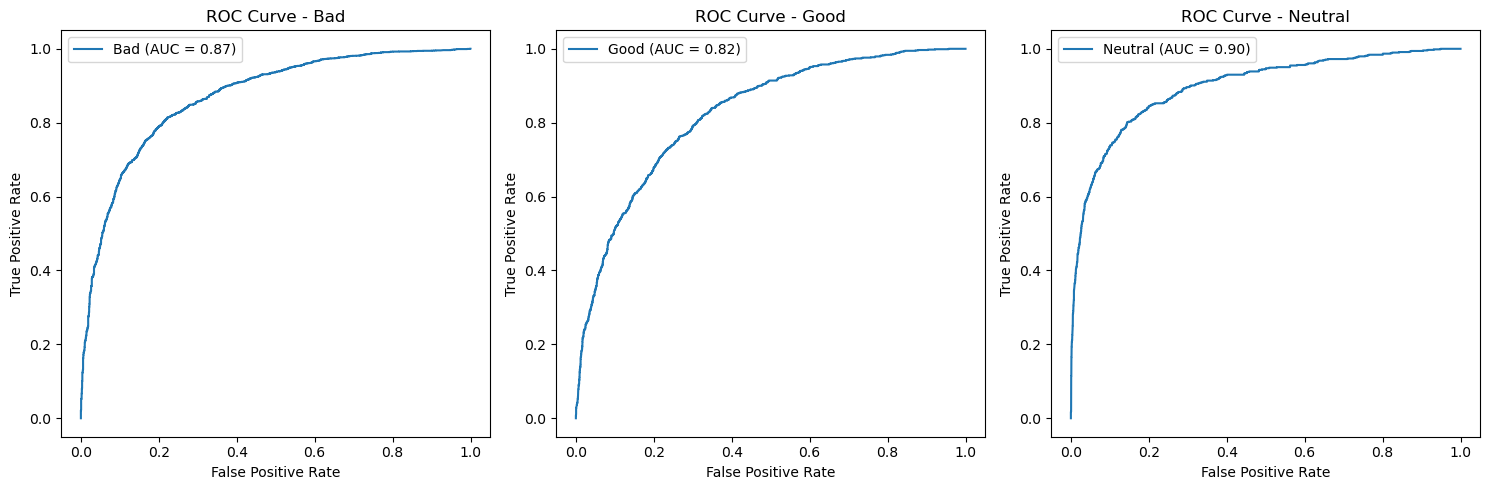

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming `model` is a trained classifier
# `X_test` is the test set features, and `y_test` is the true labels

# Get predicted probabilities for each class
y_score = model.predict_proba(x_test)

# Set num_classes to the total number of classes (3 in this case)
num_classes = 3

# Define class labels
class_labels = ['Bad', 'Good', 'Neutral']

# Plot ROC curves for each class
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {class_labels[i]}')
    axes[i].legend()

plt.tight_layout()
plt.show()


# Bad

In [16]:
msg = 'Bad and terrible experience, will not fly again with American'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [17]:
msg = 'Dirty plane, poor experience overall'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

# Good

In [18]:
msg = 'Amazing experience flying with American, I will recommend this company, much better than United!!'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [19]:
msg = 'Friendly staff, clean airplane and great snacks on board'
input = vectorizer.transform([msg])
model.predict(input)[0]

2

In [20]:
msg = 'Great company to fly with, I highly recommend it, good value for money'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

# Neutral

In [21]:
msg = 'Budget company it gets you from point A to B'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [22]:
msg = 'I am leaving a neutral review as Ryanair stands for: What you pay is what you get!!!'
input = vectorizer.transform([msg])
model.predict(input)[0]

0